$-2*K**2*a**2*b*x**3/(R*w**2) + 4*K**2*a*b**2*x**3*z/(R*w**2) - K**2*a*b*x**2/R - 2*K**2*b**3*x**3*z**2/(R*w**2) + K**2*b**2*x**2*z/R + 2*I*K*a*b*x**2/w**2 - 2*I*K*b**2*x**2*z/w**2 + I*K*b*x + 2*I*K*a**2*x**2/(R*w**2) - 4*I*K*a*b*x**2*z/(R*w**2) + I*K*a*x/R + 2*I*K*b**2*x**2*z**2/(R*w**2) - I*K*b*x*z/R + 2*a*x/w**2 - 2*b*x*z/w**2 + 1$

In [1]:
from sympy.parsing import mathematica as mc
from numpy import sin as sin
import re
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm
#import signals_calc as sig

from numpy import pi as pi
from numpy import angle
#from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from scipy.special import comb

from math import factorial as fac
import cmath
from cmath import sqrt as sqrt
import numpy as np

from time import process_time

inf=np.inf

import pandas as pd
from pprint import pprint
from copy import copy as cp

In [2]:
# 1. Mathematica solution

mat_sol = """1 - I a b K + (I a b K z)/R + (2 a b z)/w^2 + I b K x + (
 I a K x)/R + (2 a x)/w^2 - (I b K x z)/R - (2 b x z)/w^2 + (
 a b K^2 x^2 z)/R^2 - (4 a b x^2 z)/w^4 - (4 I a b K x^2 z)/(
 R w^2) - (a b K^2 x^2)/R + (2 I a b K x^2)/w^2"""

mat_sol_3 = """1 - I a b K - (I a^2 K)/(2 R) - (a^3 b K^2)/(2 R) - a^2/w^2 + (
 I a^3 b K)/w^2 + I b K x - 1/6 I b^3 K x + a b^2 K^2 x + (
 a^3 K^2 x)/(2 R^2) + (I a K x)/R - (I a b^2 K x)/R + (
 3 a^2 b K^2 x)/(2 R) - (13 a^2 b^3 K^2 x)/(12 R) - (
 I a^3 b^2 K^3 x)/(2 R) - (2 a^3 x)/w^4 + (2 a x)/w^2 - (
 2 a b^2 x)/w^2 - (3 I a^2 b K x)/w^2 + (13 I a^2 b^3 K x)/(6 w^2) - (
 a^3 b^2 K^2 x)/w^2 - (2 I a^3 K x)/(R w^2) + (2 I a^3 b^2 K x)/(
 R w^2) - 1/2 b^2 K^2 x^2 - (a^2 K^2 x^2)/(2 R^2) + (
 I a^3 b K^3 x^2)/R^2 - (I a^3 b^3 K^3 x^2)/(12 R^2) + (I b^2 K x^2)/(
 2 R) - (a b K^2 x^2)/R + (5 a b^3 K^2 x^2)/(3 R) + (
 5 I a^2 b^2 K^3 x^2)/(4 R) + (2 a^2 x^2)/w^4 - (
 4 I a^3 b K x^2)/w^4 + (I a^3 b^3 K x^2)/(3 w^4) + (b^2 x^2)/w^2 + (
 2 I a b K x^2)/w^2 - (10 I a b^3 K x^2)/(3 w^2) + (
 5 a^2 b^2 K^2 x^2)/(2 w^2) + (2 I a^2 K x^2)/(R w^2) - (
 5 I a^2 b^2 K x^2)/(R w^2) + (4 a^3 b K^2 x^2)/(R w^2) - (
 22 a^3 b^3 K^2 x^2)/(3 R w^2) - 1/6 I b^3 K^3 x^3 - (I a^3 K^3 x^3)/(
 6 R^3) - (a b^2 K^2 x^3)/(2 R^2) - (I a^2 b K^3 x^3)/(2 R^2) + (
 7 I a^2 b^3 K^3 x^3)/(12 R^2) - (3 a^3 b^2 K^4 x^3)/(4 R^2) - (
 b^3 K^2 x^3)/(2 R) - (I a b^2 K^3 x^3)/(2 R) - (a^2 b^3 K^4 x^3)/(
 12 R) + (4 a^3 x^3)/(3 w^6) + (2 a b^2 x^3)/w^4 + (
 2 I a^2 b K x^3)/w^4 - (7 I a^2 b^3 K x^3)/(3 w^4) + (
 3 a^3 b^2 K^2 x^3)/w^4 + (2 I a^3 K x^3)/(R w^4) - (
 4 I a^3 b^2 K x^3)/(R w^4) + (I b^3 K x^3)/w^2 - (
 a b^2 K^2 x^3)/w^2 + (I a^2 b^3 K^3 x^3)/(6 w^2) - (a^3 K^2 x^3)/(
 R^2 w^2) + (2 a^3 b^2 K^2 x^3)/(R^2 w^2) + (2 I a b^2 K x^3)/(
 R w^2) - (2 a^2 b K^2 x^3)/(R w^2) + (22 a^2 b^3 K^2 x^3)/(
 3 R w^2) + (3 I a^3 b^2 K^3 x^3)/(R w^2) + (a^3 b K^4 x^4)/(
 6 R^3) - (a^3 b^3 K^4 x^4)/(36 R^3) - (I a b^3 K^3 x^4)/(2 R^2) + (
 a^2 b^2 K^4 x^4)/(4 R^2) - (I a^3 b^3 K^5 x^4)/(12 R^2) + (
 a b^3 K^4 x^4)/(6 R) + (4 I a^3 b K x^4)/(3 w^6) - (
 2 I a^3 b^3 K x^4)/(9 w^6) + (2 I a b^3 K x^4)/w^4 - (
 a^2 b^2 K^2 x^4)/w^4 + (I a^3 b^3 K^3 x^4)/(3 w^4) + (
 3 I a^2 b^2 K x^4)/(R w^4) - (2 a^3 b K^2 x^4)/(R w^4) + (
 22 a^3 b^3 K^2 x^4)/(3 R w^4) - (I a b^3 K^3 x^4)/(3 w^2) - (
 3 a^2 b^2 K^2 x^4)/(2 R^2 w^2) - (I a^3 b K^3 x^4)/(R^2 w^2) + (
 11 I a^3 b^3 K^3 x^4)/(3 R^2 w^2) - (2 a b^3 K^2 x^4)/(R w^2) - (
 I a^2 b^2 K^3 x^4)/(R w^2) - (a^3 b^3 K^4 x^4)/(3 R w^2) + (
 I a^3 b^2 K^5 x^5)/(12 R^3) + (I a^2 b^3 K^5 x^5)/(12 R^2) - (
 2 a^3 b^2 K^2 x^5)/(3 w^6) + (2 I a^3 b^2 K x^5)/(3 R w^6) - (
 I a^2 b^3 K^3 x^5)/(3 w^4) - (2 a^3 b^2 K^2 x^5)/(R^2 w^4) - (
 3 a^2 b^3 K^2 x^5)/(R w^4) - (I a^3 b^2 K^3 x^5)/(R w^4) - (
 I a^3 b^2 K^3 x^5)/(6 R^3 w^2) - (3 I a^2 b^3 K^3 x^5)/(
 2 R^2 w^2) + (a^3 b^2 K^4 x^5)/(2 R^2 w^2) + (a^2 b^3 K^4 x^5)/(
 3 R w^2) - (a^3 b^3 K^6 x^6)/(36 R^3) - (2 I a^3 b^3 K^3 x^6)/(
 9 w^6) - (2 a^3 b^3 K^2 x^6)/(3 R w^6) - (2 I a^3 b^3 K^3 x^6)/(
 R^2 w^4) + (a^3 b^3 K^4 x^6)/(3 R w^4) + (a^3 b^3 K^4 x^6)/(
 6 R^3 w^2) + (I a^3 b^3 K^5 x^6)/(6 R^2 w^2) + 1/2 I b^2 K z + (
 I a b K z)/R + (5 a^2 b^2 K^2 z)/(4 R) + (2 a b z)/w^2 - (
 5 I a^2 b^2 K z)/(2 w^2) - (2 I a^3 b K z)/(R w^2) - 
 1/2 b^3 K^2 x z - (3 a^2 b K^2 x z)/(2 R^2) + (7 I a^3 b^2 K^3 x z)/(
 4 R^2) - (I b K x z)/R + (2 I b^3 K x z)/(3 R) - (5 a b^2 K^2 x z)/(
 2 R) + (5 I a^2 b^3 K^3 x z)/(4 R) + (6 a^2 b x z)/w^4 - (
 7 I a^3 b^2 K x z)/w^4 - (2 b x z)/w^2 + (4 b^3 x z)/(3 w^2) + (
 5 I a b^2 K x z)/w^2 + (5 a^2 b^3 K^2 x z)/(2 w^2) + (
 6 I a^2 b K x z)/(R w^2) - (16 I a^2 b^3 K x z)/(3 R w^2) + (
 9 a^3 b^2 K^2 x z)/(R w^2) + (a b K^2 x^2 z)/R^2 - (
 11 I a^2 b^2 K^3 x^2 z)/(4 R^2) - (7 a^3 b^3 K^4 x^2 z)/(4 R^2) + (
 b^2 K^2 x^2 z)/R - (2 I a b^3 K^3 x^2 z)/R - (4 a b x^2 z)/w^4 + (
 11 I a^2 b^2 K x^2 z)/w^4 + (7 a^3 b^3 K^2 x^2 z)/w^4 + (
 12 I a^3 b K x^2 z)/(R w^4) - (22 I a^3 b^3 K x^2 z)/(3 R w^4) - (
 2 I b^2 K x^2 z)/w^2 - (4 a b^3 K^2 x^2 z)/w^2 - (
 6 a^3 b K^2 x^2 z)/(R^2 w^2) + (11 a^3 b^3 K^2 x^2 z)/(3 R^2 w^2) - (
 4 I a b K x^2 z)/(R w^2) + (26 I a b^3 K x^2 z)/(3 R w^2) - (
 11 a^2 b^2 K^2 x^2 z)/(R w^2) + (8 I a^3 b^3 K^3 x^2 z)/(R w^2) + (
 I a^2 b K^3 x^3 z)/(2 R^3) + (7 a^3 b^2 K^4 x^3 z)/(12 R^3) + (
 b^3 K^2 x^3 z)/(2 R^2) + (I a b^2 K^3 x^3 z)/R^2 + (
 2 a^2 b^3 K^4 x^3 z)/R^2 + (I b^3 K^3 x^3 z)/(2 R) - (
 4 a^2 b x^3 z)/w^6 + (14 I a^3 b^2 K x^3 z)/(3 w^6) - (
 2 b^3 x^3 z)/w^4 - (4 I a b^2 K x^3 z)/w^4 - (
 8 a^2 b^3 K^2 x^3 z)/w^4 - (6 I a^2 b K x^3 z)/(R w^4) + (
 34 I a^2 b^3 K x^3 z)/(3 R w^4) - (19 a^3 b^2 K^2 x^3 z)/(R w^4) + (
 b^3 K^2 x^3 z)/w^2 + (3 a^2 b K^2 x^3 z)/(R^2 w^2) - (
 17 a^2 b^3 K^2 x^3 z)/(3 R^2 w^2) - (19 I a^3 b^2 K^3 x^3 z)/(
 2 R^2 w^2) - (2 I b^3 K x^3 z)/(R w^2) + (4 a b^2 K^2 x^3 z)/(
 R w^2) - (8 I a^2 b^3 K^3 x^3 z)/(R w^2) - (a^2 b^2 K^4 x^4 z)/(
 2 R^3) + (7 I a^3 b^3 K^5 x^4 z)/(12 R^3) - (a b^3 K^4 x^4 z)/(
 2 R^2) - (4 I a^2 b^2 K x^4 z)/w^6 - (14 a^3 b^3 K^2 x^4 z)/(
 3 w^6) - (16 I a^3 b K x^4 z)/(3 R w^6) + (44 I a^3 b^3 K x^4 z)/(
 9 R w^6) + (2 a b^3 K^2 x^4 z)/w^4 + (4 a^3 b K^2 x^4 z)/(
 R^2 w^4) - (8 a^3 b^3 K^2 x^4 z)/(R^2 w^4) - (6 I a b^3 K x^4 z)/(
 R w^4) + (6 a^2 b^2 K^2 x^4 z)/(R w^4) - (13 I a^3 b^3 K^3 x^4 z)/(
 R w^4) + (4 I a^3 b K^3 x^4 z)/(3 R^3 w^2) - (
 11 I a^3 b^3 K^3 x^4 z)/(9 R^3 w^2) + (3 a b^3 K^2 x^4 z)/(
 R^2 w^2) + (3 I a^2 b^2 K^3 x^4 z)/(R^2 w^2) + (
 13 a^3 b^3 K^4 x^4 z)/(2 R^2 w^2) + (2 I a b^3 K^3 x^4 z)/(R w^2) - (
 I a^2 b^3 K^5 x^5 z)/(4 R^3) + (2 a^2 b^3 K^2 x^5 z)/w^6 - (
 2 I a^2 b^3 K x^5 z)/(R w^6) + (16 a^3 b^2 K^2 x^5 z)/(3 R w^6) + (
 6 a^2 b^3 K^2 x^5 z)/(R^2 w^4) + (4 I a^3 b^2 K^3 x^5 z)/(
 R^2 w^4) + (3 I a^2 b^3 K^3 x^5 z)/(R w^4) + (I a^2 b^3 K^3 x^5 z)/(
 2 R^3 w^2) - (4 a^3 b^2 K^4 x^5 z)/(3 R^3 w^2) - (
 3 a^2 b^3 K^4 x^5 z)/(2 R^2 w^2) + (8 a^3 b^3 K^2 x^6 z)/(
 3 R^2 w^6) + (8 I a^3 b^3 K^3 x^6 z)/(3 R w^6) + (
 4 I a^3 b^3 K^3 x^6 z)/(3 R^3 w^4) - (2 a^3 b^3 K^4 x^6 z)/(
 R^2 w^4) - (2 I a^3 b^3 K^5 x^6 z)/(3 R^3 w^2) - (I b^2 K z^2)/(
 2 R) - (a b^3 K^2 z^2)/R - (b^2 z^2)/w^2 + (2 I a b^3 K z^2)/w^2 + (
 3 I a^2 b^2 K z^2)/(R w^2) + (4 a^3 b^3 K^2 z^2)/(R w^2) + (
 3 a b^2 K^2 x z^2)/(2 R^2) - (9 I a^2 b^3 K^3 x z^2)/(4 R^2) + (
 b^3 K^2 x z^2)/R - (6 a b^2 x z^2)/w^4 + (
 9 I a^2 b^3 K x z^2)/w^4 + (10 I a^3 b^2 K x z^2)/(R w^4) - (
 2 I b^3 K x z^2)/w^2 - (5 a^3 b^2 K^2 x z^2)/(R^2 w^2) - (
 6 I a b^2 K x z^2)/(R w^2) - (12 a^2 b^3 K^2 x z^2)/(R w^2) - (
 b^2 K^2 x^2 z^2)/(2 R^2) + (5 I a b^3 K^3 x^2 z^2)/(2 R^2) + (
 2 b^2 x^2 z^2)/w^4 - (10 I a b^3 K x^2 z^2)/w^4 - (
 18 I a^2 b^2 K x^2 z^2)/(R w^4) - (34 a^3 b^3 K^2 x^2 z^2)/(
 R w^4) + (9 a^2 b^2 K^2 x^2 z^2)/(R^2 w^2) - (
 17 I a^3 b^3 K^3 x^2 z^2)/(R^2 w^2) + (2 I b^2 K x^2 z^2)/(R w^2) + (
 10 a b^3 K^2 x^2 z^2)/(R w^2) - (I a b^2 K^3 x^3 z^2)/(2 R^3) - (
 3 a^2 b^3 K^4 x^3 z^2)/(4 R^3) - (I b^3 K^3 x^3 z^2)/(2 R^2) + (
 4 a b^2 x^3 z^2)/w^6 - (6 I a^2 b^3 K x^3 z^2)/w^6 - (
 20 I a^3 b^2 K x^3 z^2)/(3 R w^6) + (2 I b^3 K x^3 z^2)/w^4 + (
 20 a^3 b^2 K^2 x^3 z^2)/(R^2 w^4) + (6 I a b^2 K x^3 z^2)/(R w^4) + (
 27 a^2 b^3 K^2 x^3 z^2)/(R w^4) + (5 I a^3 b^2 K^3 x^3 z^2)/(
 3 R^3 w^2) - (3 a b^2 K^2 x^3 z^2)/(R^2 w^2) + (
 27 I a^2 b^3 K^3 x^3 z^2)/(2 R^2 w^2) - (2 b^3 K^2 x^3 z^2)/(
 R w^2) + (a b^3 K^4 x^4 z^2)/(2 R^3) + (4 I a b^3 K x^4 z^2)/w^6 + (
 8 I a^2 b^2 K x^4 z^2)/(R w^6) + (52 a^3 b^3 K^2 x^4 z^2)/(
 3 R w^6) - (6 a^2 b^2 K^2 x^4 z^2)/(R^2 w^4) + (
 28 I a^3 b^3 K^3 x^4 z^2)/(R^2 w^4) - (6 a b^3 K^2 x^4 z^2)/(
 R w^4) - (2 I a^2 b^2 K^3 x^4 z^2)/(R^3 w^2) - (
 13 a^3 b^3 K^4 x^4 z^2)/(3 R^3 w^2) - (3 I a b^3 K^3 x^4 z^2)/(
 R^2 w^2) - (20 a^3 b^2 K^2 x^5 z^2)/(3 R^2 w^6) - (
 8 a^2 b^3 K^2 x^5 z^2)/(R w^6) - (10 I a^3 b^2 K^3 x^5 z^2)/(
 3 R^3 w^4) - (6 I a^2 b^3 K^3 x^5 z^2)/(R^2 w^4) + (
 2 a^2 b^3 K^4 x^5 z^2)/(R^3 w^2) - (20 I a^3 b^3 K^3 x^6 z^2)/(
 3 R^2 w^6) + (10 a^3 b^3 K^4 x^6 z^2)/(3 R^3 w^4) - (
 2 I a b^3 K z^3)/(R w^2) - (b^3 K^2 x z^3)/(2 R^2) + (
 2 b^3 x z^3)/w^4 - (10 I a^2 b^3 K x z^3)/(R w^4) + (
 5 a^2 b^3 K^2 x z^3)/(R^2 w^2) + (2 I b^3 K x z^3)/(R w^2) + (
 20 a^3 b^3 K^2 x^2 z^3)/(R^2 w^4) + (12 I a b^3 K x^2 z^3)/(
 R w^4) - (6 a b^3 K^2 x^2 z^3)/(R^2 w^2) + (I b^3 K^3 x^3 z^3)/(
 6 R^3) - (4 b^3 x^3 z^3)/(3 w^6) + (20 I a^2 b^3 K x^3 z^3)/(
 3 R w^6) - (20 a^2 b^3 K^2 x^3 z^3)/(R^2 w^4) - (2 I b^3 K x^3 z^3)/(
 R w^4) - (5 I a^2 b^3 K^3 x^3 z^3)/(3 R^3 w^2) + (b^3 K^2 x^3 z^3)/(
 R^2 w^2) - (40 a^3 b^3 K^2 x^4 z^3)/(3 R^2 w^6) - (
 16 I a b^3 K x^4 z^3)/(3 R w^6) - (20 I a^3 b^3 K^3 x^4 z^3)/(
 3 R^3 w^4) + (4 a b^3 K^2 x^4 z^3)/(R^2 w^4) + (
 4 I a b^3 K^3 x^4 z^3)/(3 R^3 w^2) + (20 a^2 b^3 K^2 x^5 z^3)/(
 3 R^2 w^6) + (10 I a^2 b^3 K^3 x^5 z^3)/(3 R^3 w^4) + (
 40 I a^3 b^3 K^3 x^6 z^3)/(9 R^3 w^6)"""

mat_sol_4 = """1 - I a b K - (I a^2 K)/(2 R) - (a^3 b K^2)/(2 R) - a^2/w^2 + (
 I a^3 b K)/w^2 + (I a^4 K)/(2 R w^2) + I b K x - 1/6 I b^3 K x + 
 a b^2 K^2 x + (a^3 K^2 x)/(2 R^2) - (I a^4 b K^3 x)/(2 R^2) + (
 I a K x)/R - (I a b^2 K x)/R + (3 a^2 b K^2 x)/(2 R) - (
 13 a^2 b^3 K^2 x)/(12 R) - (I a^3 b^2 K^3 x)/(2 R) - (
 2 a^3 x)/w^4 + (2 I a^4 b K x)/w^4 + (2 a x)/w^2 - (
 2 a b^2 x)/w^2 - (3 I a^2 b K x)/w^2 + (13 I a^2 b^3 K x)/(6 w^2) - (
 a^3 b^2 K^2 x)/w^2 - (2 I a^3 K x)/(R w^2) + (2 I a^3 b^2 K x)/(
 R w^2) - (5 a^4 b K^2 x)/(2 R w^2) + (25 a^4 b^3 K^2 x)/(12 R w^2) - 
 1/2 b^2 K^2 x^2 - (a^2 K^2 x^2)/(2 R^2) + (I a^3 b K^3 x^2)/R^2 - (
 I a^3 b^3 K^3 x^2)/(12 R^2) + (a^4 b^2 K^4 x^2)/(2 R^2) + (
 I b^2 K x^2)/(2 R) - (a b K^2 x^2)/R + (5 a b^3 K^2 x^2)/(3 R) + (
 5 I a^2 b^2 K^3 x^2)/(4 R) - (I a^2 b^4 K^3 x^2)/R + (
 2 a^2 x^2)/w^4 - (4 I a^3 b K x^2)/w^4 + (I a^3 b^3 K x^2)/(
 3 w^4) - (2 a^4 b^2 K^2 x^2)/w^4 - (3 I a^4 K x^2)/(R w^4) + (
 2 I a^4 b^2 K x^2)/(R w^4) + (b^2 x^2)/w^2 + (2 I a b K x^2)/w^2 - (
 10 I a b^3 K x^2)/(3 w^2) + (5 a^2 b^2 K^2 x^2)/(2 w^2) - (
 2 a^2 b^4 K^2 x^2)/w^2 + (3 a^4 K^2 x^2)/(2 R^2 w^2) - (
 a^4 b^2 K^2 x^2)/(R^2 w^2) + (2 I a^2 K x^2)/(R w^2) - (
 5 I a^2 b^2 K x^2)/(R w^2) + (2 I a^2 b^4 K x^2)/(R w^2) + (
 4 a^3 b K^2 x^2)/(R w^2) - (22 a^3 b^3 K^2 x^2)/(3 R w^2) - (
 9 I a^4 b^2 K^3 x^2)/(4 R w^2) + (2 I a^4 b^4 K^3 x^2)/(R w^2) - 
 1/6 I b^3 K^3 x^3 - (I a^3 K^3 x^3)/(6 R^3) - (a^4 b K^4 x^3)/(
 6 R^3) - (a b^2 K^2 x^3)/(2 R^2) - (I a^2 b K^3 x^3)/(2 R^2) + (
 7 I a^2 b^3 K^3 x^3)/(12 R^2) - (3 a^3 b^2 K^4 x^3)/(4 R^2) - (
 b^3 K^2 x^3)/(2 R) - (I a b^2 K^3 x^3)/(2 R) + (
 I a b^4 K^3 x^3)/R - (a^2 b^3 K^4 x^3)/(12 R) + (4 a^3 x^3)/(
 3 w^6) - (4 I a^4 b K x^3)/(3 w^6) + (2 a b^2 x^3)/w^4 + (
 2 I a^2 b K x^3)/w^4 - (7 I a^2 b^3 K x^3)/(3 w^4) + (
 3 a^3 b^2 K^2 x^3)/w^4 + (2 I a^3 K x^3)/(R w^4) - (
 4 I a^3 b^2 K x^3)/(R w^4) + (5 a^4 b K^2 x^3)/(R w^4) - (
 13 a^4 b^3 K^2 x^3)/(2 R w^4) + (I b^3 K x^3)/w^2 - (
 a b^2 K^2 x^3)/w^2 + (2 a b^4 K^2 x^3)/w^2 + (I a^2 b^3 K^3 x^3)/(
 6 w^2) - (a^3 K^2 x^3)/(R^2 w^2) + (2 a^3 b^2 K^2 x^3)/(R^2 w^2) + (
 5 I a^4 b K^3 x^3)/(2 R^2 w^2) - (13 I a^4 b^3 K^3 x^3)/(
 4 R^2 w^2) + (2 I a b^2 K x^3)/(R w^2) - (2 I a b^4 K x^3)/(
 R w^2) - (2 a^2 b K^2 x^3)/(R w^2) + (22 a^2 b^3 K^2 x^3)/(
 3 R w^2) + (3 I a^3 b^2 K^3 x^3)/(R w^2) - (6 I a^3 b^4 K^3 x^3)/(
 R w^2) + (a^4 b^3 K^4 x^3)/(12 R w^2) + (a^3 b K^4 x^4)/(6 R^3) - (
 a^3 b^3 K^4 x^4)/(36 R^3) - (I a^4 b^2 K^5 x^4)/(6 R^3) - (
 I a b^3 K^3 x^4)/(2 R^2) + (a^2 b^2 K^4 x^4)/(4 R^2) - (
 a^2 b^4 K^4 x^4)/(2 R^2) - (I a^3 b^3 K^5 x^4)/(12 R^2) - (
 I b^4 K^3 x^4)/(4 R) + (a b^3 K^4 x^4)/(6 R) + (4 I a^3 b K x^4)/(
 3 w^6) - (2 I a^3 b^3 K x^4)/(9 w^6) + (4 a^4 b^2 K^2 x^4)/(
 3 w^6) + (4 I a^4 K x^4)/(3 R w^6) - (4 I a^4 b^2 K x^4)/(
 3 R w^6) + (2 I a b^3 K x^4)/w^4 - (a^2 b^2 K^2 x^4)/w^4 + (
 2 a^2 b^4 K^2 x^4)/w^4 + (I a^3 b^3 K^3 x^4)/(3 w^4) - (
 a^4 K^2 x^4)/(R^2 w^4) + (2 a^4 b^2 K^2 x^4)/(R^2 w^4) + (
 3 I a^2 b^2 K x^4)/(R w^4) - (2 I a^2 b^4 K x^4)/(R w^4) - (
 2 a^3 b K^2 x^4)/(R w^4) + (22 a^3 b^3 K^2 x^4)/(3 R w^4) + (
 7 I a^4 b^2 K^3 x^4)/(2 R w^4) - (5 I a^4 b^4 K^3 x^4)/(R w^4) - (
 b^4 K^2 x^4)/(2 w^2) - (I a b^3 K^3 x^4)/(3 w^2) - (I a^4 K^3 x^4)/(
 3 R^3 w^2) + (I a^4 b^2 K^3 x^4)/(3 R^3 w^2) - (3 a^2 b^2 K^2 x^4)/(
 2 R^2 w^2) + (a^2 b^4 K^2 x^4)/(R^2 w^2) - (I a^3 b K^3 x^4)/(
 R^2 w^2) + (11 I a^3 b^3 K^3 x^4)/(3 R^2 w^2) - (7 a^4 b^2 K^4 x^4)/(
 4 R^2 w^2) + (5 a^4 b^4 K^4 x^4)/(2 R^2 w^2) + (I b^4 K x^4)/(
 2 R w^2) - (2 a b^3 K^2 x^4)/(R w^2) - (I a^2 b^2 K^3 x^4)/(
 R w^2) + (9 I a^2 b^4 K^3 x^4)/(2 R w^2) - (a^3 b^3 K^4 x^4)/(
 3 R w^2) + (I a^3 b^2 K^5 x^5)/(12 R^3) + (a b^4 K^4 x^5)/(4 R^2) + (
 I a^2 b^3 K^5 x^5)/(12 R^2) - (2 a^3 b^2 K^2 x^5)/(3 w^6) + (
 2 I a^3 b^2 K x^5)/(3 R w^6) - (4 a^4 b K^2 x^5)/(3 R w^6) + (
 20 a^4 b^3 K^2 x^5)/(9 R w^6) - (a b^4 K^2 x^5)/w^4 - (
 I a^2 b^3 K^3 x^5)/(3 w^4) - (2 a^3 b^2 K^2 x^5)/(R^2 w^4) - (
 I a^4 b K^3 x^5)/(R^2 w^4) + (25 I a^4 b^3 K^3 x^5)/(6 R^2 w^4) + (
 I a b^4 K x^5)/(R w^4) - (3 a^2 b^3 K^2 x^5)/(R w^4) - (
 I a^3 b^2 K^3 x^5)/(R w^4) + (5 I a^3 b^4 K^3 x^5)/(R w^4) - (
 a^4 b^3 K^4 x^5)/(2 R w^4) - (I a^3 b^2 K^3 x^5)/(6 R^3 w^2) + (
 a^4 b K^4 x^5)/(3 R^3 w^2) - (5 a^4 b^3 K^4 x^5)/(9 R^3 w^2) - (
 a b^4 K^2 x^5)/(2 R^2 w^2) - (3 I a^2 b^3 K^3 x^5)/(2 R^2 w^2) + (
 a^3 b^2 K^4 x^5)/(2 R^2 w^2) - (5 a^3 b^4 K^4 x^5)/(2 R^2 w^2) - (
 I a^4 b^3 K^5 x^5)/(4 R^2 w^2) - (I a b^4 K^3 x^5)/(R w^2) + (
 a^2 b^3 K^4 x^5)/(3 R w^2) - (a^3 b^3 K^6 x^6)/(36 R^3) - (
 2 I a^3 b^3 K^3 x^6)/(9 w^6) - (2 a^4 b^2 K^2 x^6)/(3 R^2 w^6) - (
 2 a^3 b^3 K^2 x^6)/(3 R w^6) - (2 I a^4 b^2 K^3 x^6)/(3 R w^6) + (
 4 I a^4 b^4 K^3 x^6)/(3 R w^6) - (I a^4 b^2 K^3 x^6)/(3 R^3 w^4) - (
 a^2 b^4 K^2 x^6)/(R^2 w^4) - (2 I a^3 b^3 K^3 x^6)/(R^2 w^4) + (
 a^4 b^2 K^4 x^6)/(2 R^2 w^4) - (3 a^4 b^4 K^4 x^6)/(R^2 w^4) - (
 3 I a^2 b^4 K^3 x^6)/(2 R w^4) + (a^3 b^3 K^4 x^6)/(3 R w^4) + (
 a^3 b^3 K^4 x^6)/(6 R^3 w^2) + (I a^4 b^2 K^5 x^6)/(6 R^3 w^2) - (
 I a^4 b^4 K^5 x^6)/(3 R^3 w^2) + (3 a^2 b^4 K^4 x^6)/(4 R^2 w^2) + (
 I a^3 b^3 K^5 x^6)/(6 R^2 w^2) - (2 I a^4 b^3 K^3 x^7)/(
 3 R^2 w^6) - (I a^3 b^4 K^3 x^7)/(3 R w^6) + (2 a^4 b^3 K^4 x^7)/(
 9 R w^6) + (a^4 b^3 K^4 x^7)/(3 R^3 w^4) + (a^3 b^4 K^4 x^7)/(
 R^2 w^4) + (I a^4 b^3 K^5 x^7)/(6 R^2 w^4) + (I a^3 b^4 K^5 x^7)/(
 12 R^3 w^2) - (a^4 b^3 K^6 x^7)/(18 R^3 w^2) + (a^4 b^4 K^4 x^8)/(
 3 R^2 w^6) + (I a^4 b^4 K^5 x^8)/(6 R^3 w^4) + 1/2 I b^2 K z + (
 I a b K z)/R + (5 a^2 b^2 K^2 z)/(4 R) + (2 a b z)/w^2 - (
 5 I a^2 b^2 K z)/(2 w^2) - (2 I a^3 b K z)/(R w^2) - (
 9 a^4 b^2 K^2 z)/(4 R w^2) - 1/2 b^3 K^2 x z - (3 a^2 b K^2 x z)/(
 2 R^2) + (7 I a^3 b^2 K^3 x z)/(4 R^2) - (I b K x z)/R + (
 2 I b^3 K x z)/(3 R) - (5 a b^2 K^2 x z)/(2 R) + (4 a b^4 K^2 x z)/(
 3 R) + (5 I a^2 b^3 K^3 x z)/(4 R) + (6 a^2 b x z)/w^4 - (
 7 I a^3 b^2 K x z)/w^4 - (5 I a^4 b K x z)/(R w^4) - (
 2 b x z)/w^2 + (4 b^3 x z)/(3 w^2) + (5 I a b^2 K x z)/w^2 - (
 8 I a b^4 K x z)/(3 w^2) + (5 a^2 b^3 K^2 x z)/(2 w^2) + (
 5 a^4 b K^2 x z)/(2 R^2 w^2) + (6 I a^2 b K x z)/(R w^2) - (
 16 I a^2 b^3 K x z)/(3 R w^2) + (9 a^3 b^2 K^2 x z)/(R w^2) - (
 20 a^3 b^4 K^2 x z)/(3 R w^2) - (9 I a^4 b^3 K^3 x z)/(4 R w^2) + (
 a b K^2 x^2 z)/R^2 - (11 I a^2 b^2 K^3 x^2 z)/(4 R^2) + (
 I a^2 b^4 K^3 x^2 z)/(4 R^2) - (7 a^3 b^3 K^4 x^2 z)/(4 R^2) + (
 b^2 K^2 x^2 z)/R - (13 b^4 K^2 x^2 z)/(12 R) - (
 2 I a b^3 K^3 x^2 z)/R - (4 a b x^2 z)/w^4 + (
 11 I a^2 b^2 K x^2 z)/w^4 - (I a^2 b^4 K x^2 z)/w^4 + (
 7 a^3 b^3 K^2 x^2 z)/w^4 + (12 I a^3 b K x^2 z)/(R w^4) - (
 22 I a^3 b^3 K x^2 z)/(3 R w^4) + (37 a^4 b^2 K^2 x^2 z)/(
 2 R w^4) - (55 a^4 b^4 K^2 x^2 z)/(6 R w^4) - (
 2 I b^2 K x^2 z)/w^2 + (13 I b^4 K x^2 z)/(6 w^2) - (
 4 a b^3 K^2 x^2 z)/w^2 - (6 a^3 b K^2 x^2 z)/(R^2 w^2) + (
 11 a^3 b^3 K^2 x^2 z)/(3 R^2 w^2) + (37 I a^4 b^2 K^3 x^2 z)/(
 4 R^2 w^2) - (55 I a^4 b^4 K^3 x^2 z)/(12 R^2 w^2) - (
 4 I a b K x^2 z)/(R w^2) + (26 I a b^3 K x^2 z)/(3 R w^2) - (
 11 a^2 b^2 K^2 x^2 z)/(R w^2) + (35 a^2 b^4 K^2 x^2 z)/(2 R w^2) + (
 8 I a^3 b^3 K^3 x^2 z)/(R w^2) + (I a^2 b K^3 x^3 z)/(2 R^3) + (
 7 a^3 b^2 K^4 x^3 z)/(12 R^3) + (b^3 K^2 x^3 z)/(2 R^2) + (
 I a b^2 K^3 x^3 z)/R^2 - (11 I a b^4 K^3 x^3 z)/(12 R^2) + (
 2 a^2 b^3 K^4 x^3 z)/R^2 + (I b^3 K^3 x^3 z)/(2 R) + (
 a b^4 K^4 x^3 z)/(6 R) - (4 a^2 b x^3 z)/w^6 + (
 14 I a^3 b^2 K x^3 z)/(3 w^6) + (10 I a^4 b K x^3 z)/(3 R w^6) - (
 2 b^3 x^3 z)/w^4 - (4 I a b^2 K x^3 z)/w^4 + (11 I a b^4 K x^3 z)/(
 3 w^4) - (8 a^2 b^3 K^2 x^3 z)/w^4 - (10 a^4 b K^2 x^3 z)/(
 R^2 w^4) - (6 I a^2 b K x^3 z)/(R w^4) + (34 I a^2 b^3 K x^3 z)/(
 3 R w^4) - (19 a^3 b^2 K^2 x^3 z)/(R w^4) + (68 a^3 b^4 K^2 x^3 z)/(
 3 R w^4) + (16 I a^4 b^3 K^3 x^3 z)/(R w^4) + (b^3 K^2 x^3 z)/w^2 - (
 I a b^4 K^3 x^3 z)/(3 w^2) - (5 I a^4 b K^3 x^3 z)/(6 R^3 w^2) + (
 3 a^2 b K^2 x^3 z)/(R^2 w^2) - (17 a^2 b^3 K^2 x^3 z)/(3 R^2 w^2) - (
 19 I a^3 b^2 K^3 x^3 z)/(2 R^2 w^2) + (34 I a^3 b^4 K^3 x^3 z)/(
 3 R^2 w^2) - (8 a^4 b^3 K^4 x^3 z)/(R^2 w^2) - (2 I b^3 K x^3 z)/(
 R w^2) + (4 a b^2 K^2 x^3 z)/(R w^2) - (37 a b^4 K^2 x^3 z)/(
 3 R w^2) - (8 I a^2 b^3 K^3 x^3 z)/(R w^2) - (a^3 b^4 K^4 x^3 z)/(
 3 R w^2) - (a^2 b^2 K^4 x^4 z)/(2 R^3) + (a^2 b^4 K^4 x^4 z)/(
 12 R^3) + (7 I a^3 b^3 K^5 x^4 z)/(12 R^3) + (I b^4 K^3 x^4 z)/(
 2 R^2) - (a b^3 K^4 x^4 z)/(2 R^2) + (I a^2 b^4 K^5 x^4 z)/(
 4 R^2) - (b^4 K^4 x^4 z)/(6 R) - (4 I a^2 b^2 K x^4 z)/w^6 + (
 2 I a^2 b^4 K x^4 z)/(3 w^6) - (14 a^3 b^3 K^2 x^4 z)/(3 w^6) - (
 16 I a^3 b K x^4 z)/(3 R w^6) + (44 I a^3 b^3 K x^4 z)/(9 R w^6) - (
 28 a^4 b^2 K^2 x^4 z)/(3 R w^6) + (55 a^4 b^4 K^2 x^4 z)/(
 9 R w^6) - (2 I b^4 K x^4 z)/w^4 + (2 a b^3 K^2 x^4 z)/w^4 - (
 I a^2 b^4 K^3 x^4 z)/w^4 + (4 a^3 b K^2 x^4 z)/(R^2 w^4) - (
 8 a^3 b^3 K^2 x^4 z)/(R^2 w^4) - (29 I a^4 b^2 K^3 x^4 z)/(
 2 R^2 w^4) + (32 I a^4 b^4 K^3 x^4 z)/(3 R^2 w^4) - (
 6 I a b^3 K x^4 z)/(R w^4) + (6 a^2 b^2 K^2 x^4 z)/(R w^4) - (
 119 a^2 b^4 K^2 x^4 z)/(6 R w^4) - (13 I a^3 b^3 K^3 x^4 z)/(
 R w^4) - (5 a^4 b^4 K^4 x^4 z)/(6 R w^4) + (I b^4 K^3 x^4 z)/(
 3 w^2) + (4 I a^3 b K^3 x^4 z)/(3 R^3 w^2) - (
 11 I a^3 b^3 K^3 x^4 z)/(9 R^3 w^2) + (7 a^4 b^2 K^4 x^4 z)/(
 3 R^3 w^2) - (55 a^4 b^4 K^4 x^4 z)/(36 R^3 w^2) + (
 3 a b^3 K^2 x^4 z)/(R^2 w^2) + (3 I a^2 b^2 K^3 x^4 z)/(R^2 w^2) - (
 119 I a^2 b^4 K^3 x^4 z)/(12 R^2 w^2) + (13 a^3 b^3 K^4 x^4 z)/(
 2 R^2 w^2) - (5 I a^4 b^4 K^5 x^4 z)/(12 R^2 w^2) + (
 2 b^4 K^2 x^4 z)/(R w^2) + (2 I a b^3 K^3 x^4 z)/(R w^2) + (
 a^2 b^4 K^4 x^4 z)/(R w^2) - (I a^2 b^3 K^5 x^5 z)/(4 R^3) - (
 I a b^4 K^5 x^5 z)/(6 R^2) + (2 a^2 b^3 K^2 x^5 z)/w^6 + (
 10 a^4 b K^2 x^5 z)/(3 R^2 w^6) - (2 I a^2 b^3 K x^5 z)/(R w^6) + (
 16 a^3 b^2 K^2 x^5 z)/(3 R w^6) - (73 a^3 b^4 K^2 x^5 z)/(
 9 R w^6) - (23 I a^4 b^3 K^3 x^5 z)/(3 R w^6) + (
 2 I a b^4 K^3 x^5 z)/(3 w^4) + (5 I a^4 b K^3 x^5 z)/(3 R^3 w^4) + (
 6 a^2 b^3 K^2 x^5 z)/(R^2 w^4) + (4 I a^3 b^2 K^3 x^5 z)/(
 R^2 w^4) - (47 I a^3 b^4 K^3 x^5 z)/(3 R^2 w^4) + (
 19 a^4 b^3 K^4 x^5 z)/(2 R^2 w^4) + (6 a b^4 K^2 x^5 z)/(R w^4) + (
 3 I a^2 b^3 K^3 x^5 z)/(R w^4) + (2 a^3 b^4 K^4 x^5 z)/(R w^4) + (
 I a^2 b^3 K^3 x^5 z)/(2 R^3 w^2) - (4 a^3 b^2 K^4 x^5 z)/(
 3 R^3 w^2) + (73 a^3 b^4 K^4 x^5 z)/(36 R^3 w^2) + (
 23 I a^4 b^3 K^5 x^5 z)/(12 R^3 w^2) + (3 I a b^4 K^3 x^5 z)/(
 R^2 w^2) - (3 a^2 b^3 K^4 x^5 z)/(2 R^2 w^2) + (
 I a^3 b^4 K^5 x^5 z)/(R^2 w^2) - (2 a b^4 K^4 x^5 z)/(3 R w^2) + (
 a^2 b^4 K^6 x^6 z)/(12 R^3) + (2 I a^2 b^4 K^3 x^6 z)/(3 w^6) + (
 8 a^3 b^3 K^2 x^6 z)/(3 R^2 w^6) + (10 I a^4 b^2 K^3 x^6 z)/(
 3 R^2 w^6) - (32 I a^4 b^4 K^3 x^6 z)/(9 R^2 w^6) + (
 2 a^2 b^4 K^2 x^6 z)/(R w^6) + (8 I a^3 b^3 K^3 x^6 z)/(3 R w^6) + (
 5 a^4 b^4 K^4 x^6 z)/(9 R w^6) + (4 I a^3 b^3 K^3 x^6 z)/(
 3 R^3 w^4) - (5 a^4 b^2 K^4 x^6 z)/(3 R^3 w^4) + (
 16 a^4 b^4 K^4 x^6 z)/(9 R^3 w^4) + (6 I a^2 b^4 K^3 x^6 z)/(
 R^2 w^4) - (2 a^3 b^3 K^4 x^6 z)/(R^2 w^4) + (
 5 I a^4 b^4 K^5 x^6 z)/(3 R^2 w^4) - (a^2 b^4 K^4 x^6 z)/(R w^4) - (
 a^2 b^4 K^4 x^6 z)/(2 R^3 w^2) - (2 I a^3 b^3 K^5 x^6 z)/(
 3 R^3 w^2) - (5 a^4 b^4 K^6 x^6 z)/(36 R^3 w^2) - (
 I a^2 b^4 K^5 x^6 z)/(2 R^2 w^2) + (8 I a^3 b^4 K^3 x^7 z)/(
 3 R^2 w^6) - (5 a^4 b^3 K^4 x^7 z)/(3 R^2 w^6) - (
 8 a^3 b^4 K^4 x^7 z)/(9 R w^6) - (4 a^3 b^4 K^4 x^7 z)/(
 3 R^3 w^4) - (5 I a^4 b^3 K^5 x^7 z)/(6 R^3 w^4) - (
 2 I a^3 b^4 K^5 x^7 z)/(3 R^2 w^4) + (2 a^3 b^4 K^6 x^7 z)/(
 9 R^3 w^2) - (5 I a^4 b^4 K^5 x^8 z)/(9 R^2 w^6) + (
 5 a^4 b^4 K^6 x^8 z)/(18 R^3 w^4) - (I b^2 K z^2)/(2 R) - (
 a b^3 K^2 z^2)/R - (b^2 z^2)/w^2 + (2 I a b^3 K z^2)/w^2 + (
 3 I a^2 b^2 K z^2)/(R w^2) + (4 a^3 b^3 K^2 z^2)/(R w^2) + (
 3 a b^2 K^2 x z^2)/(2 R^2) - (9 I a^2 b^3 K^3 x z^2)/(4 R^2) + (
 b^3 K^2 x z^2)/R - (I a b^4 K^3 x z^2)/R - (6 a b^2 x z^2)/w^4 + (
 9 I a^2 b^3 K x z^2)/w^4 + (10 I a^3 b^2 K x z^2)/(R w^4) + (
 25 a^4 b^3 K^2 x z^2)/(2 R w^4) - (2 I b^3 K x z^2)/w^2 - (
 2 a b^4 K^2 x z^2)/w^2 - (5 a^3 b^2 K^2 x z^2)/(R^2 w^2) + (
 25 I a^4 b^3 K^3 x z^2)/(4 R^2 w^2) - (6 I a b^2 K x z^2)/(R w^2) + (
 14 I a b^4 K x z^2)/(3 R w^2) - (12 a^2 b^3 K^2 x z^2)/(R w^2) + (
 4 I a^3 b^4 K^3 x z^2)/(R w^2) - (b^2 K^2 x^2 z^2)/(2 R^2) + (
 5 I a b^3 K^3 x^2 z^2)/(2 R^2) + (9 a^2 b^4 K^4 x^2 z^2)/(4 R^2) + (
 3 I b^4 K^3 x^2 z^2)/(4 R) + (2 b^2 x^2 z^2)/w^4 - (
 10 I a b^3 K x^2 z^2)/w^4 - (9 a^2 b^4 K^2 x^2 z^2)/w^4 - (
 15 a^4 b^2 K^2 x^2 z^2)/(R^2 w^4) - (18 I a^2 b^2 K x^2 z^2)/(
 R w^4) + (10 I a^2 b^4 K x^2 z^2)/(R w^4) - (
 34 a^3 b^3 K^2 x^2 z^2)/(R w^4) + (25 I a^4 b^4 K^3 x^2 z^2)/(
 2 R w^4) + (3 b^4 K^2 x^2 z^2)/(2 w^2) + (9 a^2 b^2 K^2 x^2 z^2)/(
 R^2 w^2) - (5 a^2 b^4 K^2 x^2 z^2)/(R^2 w^2) - (
 17 I a^3 b^3 K^3 x^2 z^2)/(R^2 w^2) - (25 a^4 b^4 K^4 x^2 z^2)/(
 4 R^2 w^2) + (2 I b^2 K x^2 z^2)/(R w^2) - (11 I b^4 K x^2 z^2)/(
 3 R w^2) + (10 a b^3 K^2 x^2 z^2)/(R w^2) - (
 21 I a^2 b^4 K^3 x^2 z^2)/(2 R w^2) - (I a b^2 K^3 x^3 z^2)/(
 2 R^3) - (3 a^2 b^3 K^4 x^3 z^2)/(4 R^3) - (I b^3 K^3 x^3 z^2)/(
 2 R^2) - (7 a b^4 K^4 x^3 z^2)/(4 R^2) + (4 a b^2 x^3 z^2)/w^6 - (
 6 I a^2 b^3 K x^3 z^2)/w^6 - (20 I a^3 b^2 K x^3 z^2)/(3 R w^6) - (
 25 a^4 b^3 K^2 x^3 z^2)/(3 R w^6) + (2 I b^3 K x^3 z^2)/w^4 + (
 7 a b^4 K^2 x^3 z^2)/w^4 + (20 a^3 b^2 K^2 x^3 z^2)/(R^2 w^4) - (
 40 I a^4 b^3 K^3 x^3 z^2)/(R^2 w^4) + (6 I a b^2 K x^3 z^2)/(
 R w^4) - (32 I a b^4 K x^3 z^2)/(3 R w^4) + (
 27 a^2 b^3 K^2 x^3 z^2)/(R w^4) - (29 I a^3 b^4 K^3 x^3 z^2)/(
 R w^4) + (5 I a^3 b^2 K^3 x^3 z^2)/(3 R^3 w^2) + (
 25 a^4 b^3 K^4 x^3 z^2)/(12 R^3 w^2) - (3 a b^2 K^2 x^3 z^2)/(
 R^2 w^2) + (16 a b^4 K^2 x^3 z^2)/(3 R^2 w^2) + (
 27 I a^2 b^3 K^3 x^3 z^2)/(2 R^2 w^2) + (29 a^3 b^4 K^4 x^3 z^2)/(
 2 R^2 w^2) - (2 b^3 K^2 x^3 z^2)/(R w^2) + (7 I a b^4 K^3 x^3 z^2)/(
 R w^2) + (a b^3 K^4 x^4 z^2)/(2 R^3) - (3 I a^2 b^4 K^5 x^4 z^2)/(
 4 R^3) + (b^4 K^4 x^4 z^2)/(4 R^2) + (4 I a b^3 K x^4 z^2)/w^6 + (
 6 a^2 b^4 K^2 x^4 z^2)/w^6 + (10 a^4 b^2 K^2 x^4 z^2)/(R^2 w^6) + (
 8 I a^2 b^2 K x^4 z^2)/(R w^6) - (20 I a^2 b^4 K x^4 z^2)/(
 3 R w^6) + (52 a^3 b^3 K^2 x^4 z^2)/(3 R w^6) - (
 25 I a^4 b^4 K^3 x^4 z^2)/(3 R w^6) - (b^4 K^2 x^4 z^2)/w^4 + (
 5 I a^4 b^2 K^3 x^4 z^2)/(R^3 w^4) - (6 a^2 b^2 K^2 x^4 z^2)/(
 R^2 w^4) + (12 a^2 b^4 K^2 x^4 z^2)/(R^2 w^4) + (
 28 I a^3 b^3 K^3 x^4 z^2)/(R^2 w^4) + (65 a^4 b^4 K^4 x^4 z^2)/(
 2 R^2 w^4) + (3 I b^4 K x^4 z^2)/(R w^4) - (6 a b^3 K^2 x^4 z^2)/(
 R w^4) + (18 I a^2 b^4 K^3 x^4 z^2)/(R w^4) - (
 2 I a^2 b^2 K^3 x^4 z^2)/(R^3 w^2) + (5 I a^2 b^4 K^3 x^4 z^2)/(
 3 R^3 w^2) - (13 a^3 b^3 K^4 x^4 z^2)/(3 R^3 w^2) + (
 25 I a^4 b^4 K^5 x^4 z^2)/(12 R^3 w^2) - (3 b^4 K^2 x^4 z^2)/(
 2 R^2 w^2) - (3 I a b^3 K^3 x^4 z^2)/(R^2 w^2) - (
 9 a^2 b^4 K^4 x^4 z^2)/(R^2 w^2) - (I b^4 K^3 x^4 z^2)/(R w^2) + (
 I a b^4 K^5 x^5 z^2)/(4 R^3) - (2 a b^4 K^2 x^5 z^2)/w^6 - (
 20 a^3 b^2 K^2 x^5 z^2)/(3 R^2 w^6) + (55 I a^4 b^3 K^3 x^5 z^2)/(
 3 R^2 w^6) + (2 I a b^4 K x^5 z^2)/(R w^6) - (
 8 a^2 b^3 K^2 x^5 z^2)/(R w^6) + (14 I a^3 b^4 K^3 x^5 z^2)/(
 R w^6) - (10 I a^3 b^2 K^3 x^5 z^2)/(3 R^3 w^4) - (
 55 a^4 b^3 K^4 x^5 z^2)/(6 R^3 w^4) - (6 a b^4 K^2 x^5 z^2)/(
 R^2 w^4) - (6 I a^2 b^3 K^3 x^5 z^2)/(R^2 w^4) - (
 18 a^3 b^4 K^4 x^5 z^2)/(R^2 w^4) - (3 I a b^4 K^3 x^5 z^2)/(
 R w^4) - (I a b^4 K^3 x^5 z^2)/(2 R^3 w^2) + (
 2 a^2 b^3 K^4 x^5 z^2)/(R^3 w^2) - (7 I a^3 b^4 K^5 x^5 z^2)/(
 2 R^3 w^2) + (3 a b^4 K^4 x^5 z^2)/(2 R^2 w^2) - (
 10 I a^4 b^2 K^3 x^6 z^2)/(3 R^3 w^6) - (4 a^2 b^4 K^2 x^6 z^2)/(
 R^2 w^6) - (20 I a^3 b^3 K^3 x^6 z^2)/(3 R^2 w^6) - (
 40 a^4 b^4 K^4 x^6 z^2)/(3 R^2 w^6) - (4 I a^2 b^4 K^3 x^6 z^2)/(
 R w^6) - (2 I a^2 b^4 K^3 x^6 z^2)/(R^3 w^4) + (
 10 a^3 b^3 K^4 x^6 z^2)/(3 R^3 w^4) - (20 I a^4 b^4 K^5 x^6 z^2)/(
 3 R^3 w^4) + (3 a^2 b^4 K^4 x^6 z^2)/(R^2 w^4) + (
 I a^2 b^4 K^5 x^6 z^2)/(R^3 w^2) + (10 a^4 b^3 K^4 x^7 z^2)/(
 3 R^3 w^6) + (10 a^3 b^4 K^4 x^7 z^2)/(3 R^2 w^6) + (
 5 I a^3 b^4 K^5 x^7 z^2)/(3 R^3 w^4) + (5 I a^4 b^4 K^5 x^8 z^2)/(
 3 R^3 w^6) + (b^4 K^2 z^3)/(4 R) - (I b^4 K z^3)/(2 w^2) - (
 2 I a b^3 K z^3)/(R w^2) - (7 a^2 b^4 K^2 z^3)/(2 R w^2) - (
 b^3 K^2 x z^3)/(2 R^2) + (5 I a b^4 K^3 x z^3)/(4 R^2) + (
 2 b^3 x z^3)/w^4 - (5 I a b^4 K x z^3)/w^4 - (10 I a^2 b^3 K x z^3)/(
 R w^4) - (15 a^3 b^4 K^2 x z^3)/(R w^4) + (5 a^2 b^3 K^2 x z^3)/(
 R^2 w^2) - (15 I a^3 b^4 K^3 x z^3)/(2 R^2 w^2) + (2 I b^3 K x z^3)/(
 R w^2) + (7 a b^4 K^2 x z^3)/(R w^2) - (3 I b^4 K^3 x^2 z^3)/(
 4 R^2) + (3 I b^4 K x^2 z^3)/w^4 + (20 a^3 b^3 K^2 x^2 z^3)/(
 R^2 w^4) - (55 I a^4 b^4 K^3 x^2 z^3)/(2 R^2 w^4) + (
 12 I a b^3 K x^2 z^3)/(R w^4) + (31 a^2 b^4 K^2 x^2 z^3)/(R w^4) - (
 6 a b^3 K^2 x^2 z^3)/(R^2 w^2) + (31 I a^2 b^4 K^3 x^2 z^3)/(
 2 R^2 w^2) - (3 b^4 K^2 x^2 z^3)/(R w^2) + (I b^3 K^3 x^3 z^3)/(
 6 R^3) + (5 a b^4 K^4 x^3 z^3)/(12 R^3) - (4 b^3 x^3 z^3)/(3 w^6) + (
 10 I a b^4 K x^3 z^3)/(3 w^6) + (20 I a^2 b^3 K x^3 z^3)/(
 3 R w^6) + (10 a^3 b^4 K^2 x^3 z^3)/(R w^6) - (
 20 a^2 b^3 K^2 x^3 z^3)/(R^2 w^4) + (50 I a^3 b^4 K^3 x^3 z^3)/(
 R^2 w^4) - (2 I b^3 K x^3 z^3)/(R w^4) - (17 a b^4 K^2 x^3 z^3)/(
 R w^4) - (5 I a^2 b^3 K^3 x^3 z^3)/(3 R^3 w^2) - (
 5 a^3 b^4 K^4 x^3 z^3)/(2 R^3 w^2) + (b^3 K^2 x^3 z^3)/(R^2 w^2) - (
 17 I a b^4 K^3 x^3 z^3)/(2 R^2 w^2) - (b^4 K^4 x^4 z^3)/(6 R^3) - (
 4 I b^4 K x^4 z^3)/(3 w^6) - (40 a^3 b^3 K^2 x^4 z^3)/(3 R^2 w^6) + (
 55 I a^4 b^4 K^3 x^4 z^3)/(3 R^2 w^6) - (16 I a b^3 K x^4 z^3)/(
 3 R w^6) - (16 a^2 b^4 K^2 x^4 z^3)/(R w^6) - (
 20 I a^3 b^3 K^3 x^4 z^3)/(3 R^3 w^4) - (55 a^4 b^4 K^4 x^4 z^3)/(
 6 R^3 w^4) + (4 a b^3 K^2 x^4 z^3)/(R^2 w^4) - (
 27 I a^2 b^4 K^3 x^4 z^3)/(R^2 w^4) + (2 b^4 K^2 x^4 z^3)/(R w^4) + (
 4 I a b^3 K^3 x^4 z^3)/(3 R^3 w^2) + (4 a^2 b^4 K^4 x^4 z^3)/(
 R^3 w^2) + (I b^4 K^3 x^4 z^3)/(R^2 w^2) + (20 a^2 b^3 K^2 x^5 z^3)/(
 3 R^2 w^6) - (70 I a^3 b^4 K^3 x^5 z^3)/(3 R^2 w^6) + (
 16 a b^4 K^2 x^5 z^3)/(3 R w^6) + (10 I a^2 b^3 K^3 x^5 z^3)/(
 3 R^3 w^4) + (35 a^3 b^4 K^4 x^5 z^3)/(3 R^3 w^4) + (
 4 I a b^4 K^3 x^5 z^3)/(R^2 w^4) - (4 a b^4 K^4 x^5 z^3)/(
 3 R^3 w^2) + (40 I a^3 b^3 K^3 x^6 z^3)/(9 R^3 w^6) + (
 55 a^4 b^4 K^4 x^6 z^3)/(9 R^3 w^6) + (20 I a^2 b^4 K^3 x^6 z^3)/(
 3 R^2 w^6) - (10 a^2 b^4 K^4 x^6 z^3)/(3 R^3 w^4) - (
 40 a^3 b^4 K^4 x^7 z^3)/(9 R^3 w^6) + (I b^4 K z^4)/(2 R w^2) + (
 5 I a b^4 K x z^4)/(R w^4) - (5 a b^4 K^2 x z^4)/(2 R^2 w^2) - (
 15 a^2 b^4 K^2 x^2 z^4)/(R^2 w^4) - (3 I b^4 K x^2 z^4)/(R w^4) + (
 3 b^4 K^2 x^2 z^4)/(2 R^2 w^2) - (10 I a b^4 K x^3 z^4)/(3 R w^6) + (
 10 a b^4 K^2 x^3 z^4)/(R^2 w^4) + (5 I a b^4 K^3 x^3 z^4)/(
 6 R^3 w^2) + (10 a^2 b^4 K^2 x^4 z^4)/(R^2 w^6) + (
 4 I b^4 K x^4 z^4)/(3 R w^6) + (5 I a^2 b^4 K^3 x^4 z^4)/(
 R^3 w^4) - (b^4 K^2 x^4 z^4)/(R^2 w^4) - (I b^4 K^3 x^4 z^4)/(
 3 R^3 w^2) - (10 a b^4 K^2 x^5 z^4)/(3 R^2 w^6) - (
 5 I a b^4 K^3 x^5 z^4)/(3 R^3 w^4) - (10 I a^2 b^4 K^3 x^6 z^4)/(
 3 R^3 w^6)"""

In [3]:
# 2. Parse for Python

pars_sol=mc.mathematica(mat_sol)
print(pars_sol)
str_pars_sol = str(pars_sol)

print(str_pars_sol.split(' '))
sol_list = str_pars_sol.split(' ')



#remove '+', prepend '-'
for i in range(len(sol_list)):
    j = sol_list[i]
    if(j == '-'):
        sol_list[i+1]= '-' + sol_list[i+1]
    
sol_list[:] = [i for i in sol_list if i != '+']
sol_list[:] = [i for i in sol_list if i != '-']
      
print("Terms list:")
print(sol_list)

-K**2*a*b*x**2/R + K**2*a*b*x**2*z/R**2 - I*K*a*b + 2*I*K*a*b*x**2/w**2 + I*K*b*x + I*K*a*b*z/R - 4*I*K*a*b*x**2*z/(R*w**2) + I*K*a*x/R - I*K*b*x*z/R + 2*a*b*z/w**2 - 4*a*b*x**2*z/w**4 + 2*a*x/w**2 - 2*b*x*z/w**2 + 1
['-K**2*a*b*x**2/R', '+', 'K**2*a*b*x**2*z/R**2', '-', 'I*K*a*b', '+', '2*I*K*a*b*x**2/w**2', '+', 'I*K*b*x', '+', 'I*K*a*b*z/R', '-', '4*I*K*a*b*x**2*z/(R*w**2)', '+', 'I*K*a*x/R', '-', 'I*K*b*x*z/R', '+', '2*a*b*z/w**2', '-', '4*a*b*x**2*z/w**4', '+', '2*a*x/w**2', '-', '2*b*x*z/w**2', '+', '1']
Terms list:
['-K**2*a*b*x**2/R', 'K**2*a*b*x**2*z/R**2', '-I*K*a*b', '2*I*K*a*b*x**2/w**2', 'I*K*b*x', 'I*K*a*b*z/R', '-4*I*K*a*b*x**2*z/(R*w**2)', 'I*K*a*x/R', '-I*K*b*x*z/R', '2*a*b*z/w**2', '-4*a*b*x**2*z/w**4', '2*a*x/w**2', '-2*b*x*z/w**2', '1']


In [4]:
#3. Separate terms list for x-coordinate dependence

#get highest n for x**n

sols_arr = ['']*10

#remove x**n and put term into sol_list[n]
for i in sol_list:
    #if x -> arr[n]
    #nonlinear
    if('x**' in i):
        n_ind=i.find('x')+3 #get exp index
        n = int(i[n_ind]) #set n to exp
        sols_arr[n] += '+' + i #insert term at nth row of arr  
    #no x -> arr[0]
    elif(not 'x' in i):
        sols_arr[0]+= '+' + i
        #linear 
    else:
        sols_arr[1]+= '+' + i

sols_arr = [p for p in sols_arr if p != '']


In [5]:
print(sols_arr)

['+-I*K*a*b+I*K*a*b*z/R+2*a*b*z/w**2+1', '+I*K*b*x+I*K*a*x/R+-I*K*b*x*z/R+2*a*x/w**2+-2*b*x*z/w**2', '+-K**2*a*b*x**2/R+K**2*a*b*x**2*z/R**2+2*I*K*a*b*x**2/w**2+-4*I*K*a*b*x**2*z/(R*w**2)+-4*a*b*x**2*z/w**4']


In [6]:
print(sols_arr[0])

+-I*K*a*b+I*K*a*b*z/R+2*a*b*z/w**2+1


In [7]:
print(sols_arr[1])

+I*K*b*x+I*K*a*x/R+-I*K*b*x*z/R+2*a*x/w**2+-2*b*x*z/w**2


In [8]:
print(sols_arr[2])

+-K**2*a*b*x**2/R+K**2*a*b*x**2*z/R**2+2*I*K*a*b*x**2/w**2+-4*I*K*a*b*x**2*z/(R*w**2)+-4*a*b*x**2*z/w**4


In [9]:
for i in range(len(sols_arr)):
    print(i)

0
1
2


In [10]:
#x dep
def x_plus_1(w0,z,zr,n):    
    factor = (w0/2)*( ( 1-(1j)*(z/zr) )*np.sqrt(n+1))
    return(factor)

#x dep
def x_minus_1(w0,z,zr,n):
    factor = (w0/2)*( np.sqrt(n)*(1+(1j)*(z/zr)) )
    return(factor)

In [11]:
#represents iterative x transformation
##starts at n-E
##iterates (c+d) times, this is x order
##returns a queue with X_{+/-}^1(n) for each n
#n start is n-e

class Item:
    def __init__(self, n,N,coeff):
        self.n = n
        self.N = N
        self.coeff = coeff

def transform_x (E,x_order, a,w,gouy,n, w0,z,zr):
    q1 = []
    q2 = []
    #queue of items which are passed each iteration
    coeff = 1 #coeff can be worked in this fxn, then multiplied to overall coupling after

    N = n-E #start at n-E
    start_item = Item(n,N,coeff)
    q1.append(start_item) #just for printing, need 3-array. to track inc/dec
    
    x_count = x_order  #counter to track iterations
#     print("n,E,N",n,E,N)
    
    #empty q1 iteratively and raise and lower
    while(x_count!=0):
        while(q1):
            #get from q1
            item = cp(q1.pop())
            
            #raise n, factor X_+^1(n)  **raising doesn't involve factor n**
            item_raise = cp(item)
            
            item_raise.coeff = item_raise.coeff*x_plus_1(w0,z,zr,item_raise.N)
            item_raise.N += 1 #overall n mode up
            
            
            q2.append(item_raise) # put into temp q
            
            
            #lower n, factor X_-^1(n)
            item_lower = cp(item)
            
            if(item_lower.N>0):
                item_lower.coeff = item_lower.coeff*x_minus_1(w0,z,zr,item_lower.N)
                item_lower.N -= 1 #overall n mode down

                q2.append(item_lower) #put into temp q
            
        #empty q2 back into q1 to re-iterate
        while(q2):
            q1.append(q2.pop())
            
        x_count-=1 #iteration done, decrement count
        
    
    #all x factors transformed, return full queue
    return(q1)

In [12]:
#represents the sums
def update_modes (z,params,a,b,modes,sols_arr):
    #get params
    K = params.getK()
    w0 = params.getW0()
    zr = params.getZr()
    w = pl.w(z,params)
    gouy = pl.gouy_phase(z,params) 
    R = pl.radius_curvature(z,params)
    
    #build new modes (up to 2 orders larger for quad. dep.)
    rows = len(modes)
    cols = len(modes[0])  
    number_modes = rows*cols
    exp_order = len(sols_arr)
    new_modes = [[0 for m in range(cols+exp_order)] for n in range(rows+exp_order)]
    
    
    #calculate all coupling factors a->e\d
       
    for n in range(len(modes)):
        for m in range(len(modes[n])):
            if (modes[n][m]!=0): #break if c_nm = 0
                c_nm = modes[n][m] #assign c_nm
                
                #build up couplings
                coupling_list = []
                #list of eval'd couplings
                for x_order in range(len(sols_arr)):
                    coupling_list.append(eval(sols_arr[x_order]))
                    
                    #do x transformation 
                    #start at n_start+n
                    n_start=0
                    if(x_order>0):
                        q = transform_x (n_start,x_order,a,w,gouy,n,w0,z,zr)

                        #empty the q
                        while(q):
                            item = cp(q.pop())
                            X = item.coeff #just x coupling
                            N = item.N #final n order
                            
                            if(N>=0):
                                new_modes[N][m]+= c_nm*coupling_list[x_order]*X

                                #ind_list.append(Ind(n,m,F,A,B,C,D,E,X,N))

                    else:
                        N=n-n_start
                        X=''
                        new_modes[N][m]+= c_nm*coupling_list[x_order]
                            
# return(new_modes,ind_list)
    return(new_modes)

In [13]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
# mat = scipy.io.loadmat('paul_coef_file.mat')
# for x in mat:
#   print(x)
# coef=mat['coeftopUnitInt'].ravel()
# print(mat['readmepaul'])
coef=mat['coeftop'].ravel()

def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes

#area = pi*1e-3**2
area = 1
#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]/sqrt(area)
    
    

In [14]:
#loop through and sum over modes overlap where a,b -> n,m
def iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y,modes):   

    N = len(modes)
    M = len(modes[0])
    res_arr = [[0 for i in range(10)] for j in range(10)]
    res = 0

    for a in range(N):
        for b in range(M):            
            #ignore zero coeff.
            if (modes[a][b]!=0):
                c_nm = modes[a][b]
                #result is the sum of all overlap coefficients each with a factor of mode coefficient
                res += ( c_nm * th.overlap(a,b,w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y) )
                
    return(res)

In [15]:
def signals(v):
    #points determine size of arrays (equivalent to # data points plotted)
    points = v.points
    time_start = process_time()

    time_ave = 0

    #modes_arr = [0]*points
    cl = [0]*points
    cr = [0]*points
    phi_l = [0]*points
    phi_r = [0]*points
    dws = [0]*points
    lps = [0]*points
    total_lps = [0]*points


    #alpha_arr = np.linspace(-500e-6,500e-6,points)

    for p in range (points):
        time_ave_start = process_time()
        #shift x+zsina
        new_modes = update_modes(v.z,v.params,v.a,v.alpha_arr[p],modes_0,sols_arr)
       
        #create arrays of overlap coefficients left and right
        cl[p] = iterate_modes_overlap(v.w_1,v.w_2,v.zR_1,v.zR_2,v.k_1,v.k_2,v.d_1,v.W_2,v.x_1L,v.x_2L,v.Z,v.Y,new_modes) # left overlap (-2e-3,0)

        cr[p] = iterate_modes_overlap(v.w_1,v.w_2,v.zR_1,v.zR_2,v.k_1,v.k_2,v.d_1,v.W_2,v.x_1R,v.x_2R,v.Z,v.Y,new_modes) # right overlap (0,2e-3)
        time_ave += (process_time()-time_ave_start)

        #create arrays of phases for left and right coeff.
        phi_r[p]=angle(cr[p])
        phi_l[p]=angle(cl[p])
        
        #create arrays of dws &lps for phases in phase arrays
        dws[p] = (phi_r[p]-phi_l[p])
        lps[p] = 0.5*(phi_r[p]+phi_l[p])/v.k_1
        total_lps[p] = angle(cr[p]+cl[p])/v.k_1
    #total time for all DWS & LPS points (not including scattering)
    time_elapsed = (process_time() - time_start)
    print(time_elapsed,'s')
    print(time_ave/p,'s')
    
    return(dws,lps,total_lps)

num=101
waist = 1e-3

class Vars:
#modes,alpha with points
    def __init__(self, 
                 lam=1064e-9,
                 z_PD=10e-3,z=10e-3,
                 z_m=0,Z=10e-3,
                 z_LO=0, d_1=10e-3,
#                  z_PD=0,z=0,
#                  z_m=0,Z=0,
#                  z_LO=0, d_1=0,
                 Y=20e-3,
                 x_1R=10e-6,x_2R=20e-3,
                 x_1L=-20e-3,x_2L=-10e-6,
                 w_1=1e-3, w_2=waist,
                 zR_1=pi*1e-3**2/1064e-9,zR_2=pi*waist**2/1064e-9,
                 k_1=5905249.348852994,k_2=5905249.348852994,
                 params=pl.Params(1064e-9,waist,0),
                 W_2=1e-3,
                 points=num,
                 a=10e-6,alpha_arr=np.linspace(-500e-6,500e-6,num),modes_arr=[0]*num):
        self.lam = lam


        self.z_PD = z_PD #PD location
        self.z = z #prop distance assumed PD

        self.z_m = z_m #meas beam 
        self.Z = Z #distance PD-m

        self.z_LO = z_LO #Local ref. beam
        self.d_1 = d_1 #distance PD-LO


        self.Y = Y #Y int bound

        self.x_1R = x_1R
        self.x_2R = x_2R 

        self.x_1L = x_1L #assumed symmetric with right side
        self.x_2L = x_2L

        self.w_1 = w_1 #waist LO 
        self.w_2 = w_2 #waist MS

        self.zR_1 = zR_1 #rayleigh LO
        self.zR_2 = zR_2


        self.k_1 = k_1 #wavenum LO
        self.k_2 = k_2

        self.params = params #for building tophat coefficients

        self.W_2 = pl.w(z,pl.Params(1064e-9,waist,0)) #tophat beam rad , w(z) or 1e-3?



        #integration and misalignment
        self.points = points

        self.a = a
        self.alpha_arr = alpha_arr

        self.modes_arr = modes_arr

        #build modes from misalignments
        for p in range (points):
            self.modes_arr[p] = update_modes(z,params,a,alpha_arr[p],modes_0,sols_arr) #array of array of scattered modes#array of array of scattered modes

    def setz(self,z):
        self.z = z #prop distance assumed PD
        self.z_PD = z #PD location
        
        self.Z = z-self.z_m #distance PD-m

        self.d_1 = self.z_PD-self.z_LO #distance PD-LO
    
        self.W_2 = pl.w(z,pl.Params(1064e-9,waist,0))
        
        #scattering also depends on z...
        for p in range (self.points):
            self.modes_arr[p] = [0]*p #clear modes
            self.modes_arr[p] = update_modes(z,params,a,alpha_arr[p],modes_0,sols_arr) #array of array of scattered modes#array of array of scattered modes

        


0.09375 s
0.00078125 s


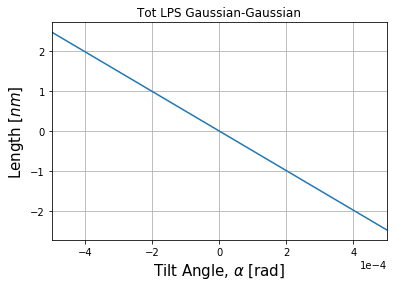

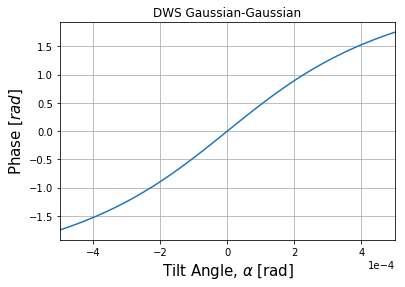

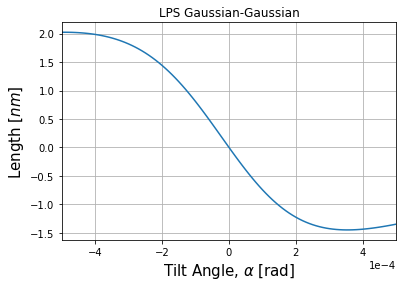

In [16]:
modes_0 = plb.modes((0,0,1))

x=1
I=1j

# z=10e-3
# params = pl.Params(1064e-9,1e-3,z)



v = Vars()
dws,lps,total_lps = signals(v)


params=pl.Params(1064e-9,waist,0)
K=params.getK()

total_arr = np.array(total_lps)
total_arr_con = total_arr*1e9

lps_arr = np.array(lps)
lps_arr_con = lps_arr*1e9

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel(r'Length $[' +  'nm]$', fontsize=15) 
plt.title(r'Tot LPS Gaussian-Gaussian') 
plt.xlim([-500e-6,500e-6])
# plt.legend()
plt.plot(v.alpha_arr,total_arr_con)


plt.grid()

plt.figure()

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel(r'Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'DWS Gaussian-Gaussian') 
plt.xlim([-500e-6,500e-6])
# plt.legend()
plt.plot(v.alpha_arr,dws)

plt.grid()

plt.figure()



plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel(r'Length $[' +  'nm]$', fontsize=15) 
plt.title(r'LPS Gaussian-Gaussian') 
plt.xlim([-500e-6,500e-6])
# plt.legend()
plt.plot(v.alpha_arr,lps_arr_con)


plt.grid()

In [17]:
# modes_0 = plb.modes((0,0,1))

# x=1
# I=1j

# # z=10e-3
# # params = pl.Params(1064e-9,1e-3,z)



# v = Vars()
# dws,lps,total_lps = signals(v)


# params=pl.Params(1064e-9,waist,0)
# K=params.getK()

# total_arr = np.array(total_lps)
# total_arr_con = total_arr*1e9

# lps_arr = np.array(lps)
# lps_arr_con = lps_arr*1e9

# plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylabel(r'Length $[' +  'nm]$', fontsize=15) 
# plt.title(r'Tot LPS Gaussian-Gaussian') 
# plt.xlim([-300e-6,300e-6])
# # plt.legend()
# plt.plot(v.alpha_arr,total_arr_con)


# plt.grid()

# plt.figure()

# plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylabel(r'Phase $[' +  'rad]$', fontsize=15) 
# plt.title(r'DWS Gaussian-Gaussian') 
# plt.xlim([-300e-6,300e-6]); plt.ylim([-2,2])
# # plt.legend()
# plt.plot(v.alpha_arr,dws)

# plt.grid()

# plt.figure()



# plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.ylabel(r'Length $[' +  'nm]$', fontsize=15) 
# plt.title(r'LPS Gaussian-Gaussian') 
# plt.xlim([-300e-6,300e-6]); plt.ylim([-5,5])
# # plt.legend()
# plt.plot(v.alpha_arr,lps_arr_con)


# plt.grid()

In [18]:
lps = lps_arr_con; total_lps = total_arr_con;

dws_slope = np.zeros(len(dws),np.float)
dws_slope[0:-1] = np.diff(dws)/np.diff(v.alpha_arr)
dws_slope[-1] = (dws[-1] - dws[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])
lps_slope = np.zeros(len(lps),np.float)
lps_slope[0:-1] = np.diff(lps)/np.diff(v.alpha_arr)
lps_slope[-1] = (lps[-1] - lps[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])
total_lps_slope = np.zeros(len(total_lps),np.float)
total_lps_slope[0:-1] = np.diff(total_lps)/np.diff(v.alpha_arr)
total_lps_slope[-1] = (total_lps[-1] - total_lps[-2])/(v.alpha_arr[-1] - v.alpha_arr[-2])




###############################################
note = '_1_1'

scipy.io.savemat('hg00'+note+'.mat', mdict={'angle': v.alpha_arr, 'lps'+note: lps, 'total_lps'+note: total_lps,'dws_HG00'+note: dws,
                                         'lps_slope'+note: lps_slope, 'total_lps_slope'+note : total_lps_slope,
                                        'dws_slope'+note: dws_slope})

print(v.alpha_arr)

[-5.0e-04 -4.9e-04 -4.8e-04 -4.7e-04 -4.6e-04 -4.5e-04 -4.4e-04 -4.3e-04
 -4.2e-04 -4.1e-04 -4.0e-04 -3.9e-04 -3.8e-04 -3.7e-04 -3.6e-04 -3.5e-04
 -3.4e-04 -3.3e-04 -3.2e-04 -3.1e-04 -3.0e-04 -2.9e-04 -2.8e-04 -2.7e-04
 -2.6e-04 -2.5e-04 -2.4e-04 -2.3e-04 -2.2e-04 -2.1e-04 -2.0e-04 -1.9e-04
 -1.8e-04 -1.7e-04 -1.6e-04 -1.5e-04 -1.4e-04 -1.3e-04 -1.2e-04 -1.1e-04
 -1.0e-04 -9.0e-05 -8.0e-05 -7.0e-05 -6.0e-05 -5.0e-05 -4.0e-05 -3.0e-05
 -2.0e-05 -1.0e-05  0.0e+00  1.0e-05  2.0e-05  3.0e-05  4.0e-05  5.0e-05
  6.0e-05  7.0e-05  8.0e-05  9.0e-05  1.0e-04  1.1e-04  1.2e-04  1.3e-04
  1.4e-04  1.5e-04  1.6e-04  1.7e-04  1.8e-04  1.9e-04  2.0e-04  2.1e-04
  2.2e-04  2.3e-04  2.4e-04  2.5e-04  2.6e-04  2.7e-04  2.8e-04  2.9e-04
  3.0e-04  3.1e-04  3.2e-04  3.3e-04  3.4e-04  3.5e-04  3.6e-04  3.7e-04
  3.8e-04  3.9e-04  4.0e-04  4.1e-04  4.2e-04  4.3e-04  4.4e-04  4.5e-04
  4.6e-04  4.7e-04  4.8e-04  4.9e-04  5.0e-04]
